# Tensors
Tensors are generalization of matrix to an arbitrary number of dimensions. 
Tensors are containers for numerical data and usually used as form to store data in ML.

### Scalars (rank-0 tensors)

In [4]:
import numpy as np
x = np.array(12)
x.ndim

0

### Vectors (rank-1 tensors)

In [5]:
x = np.array([1,2,3,4,5])
x.ndim

1

### Matrices (rank-2 tensors)

In [1]:
x = np.array([[1,2,3],
                [4,5,6]])
x.ndim

<IPython.core.display.Javascript object>

2

### Rank-3 tensors and higher-rank tensors

In [2]:
x = np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])
x.ndim

<IPython.core.display.Javascript object>

3

## Key Attributes of tensor
1. Number of axes (rank)
=> For instance, a rank-3 tensor has three axes, and a matrix has
two axes. This is also called the tensor’s `ndim` in Python libraries such as NumPy or ndim
TensorFlow.

2. Shape
=> This is a tuple of integers that describes how many dimensions the tensor has
along each axis. 

3. Data type (`dtype`)
=> Types are `float32`, `float16`, `float64`, `uint8`, `string` etc.

## Understanding concepts with Example

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.ndim

3

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images.dtype

dtype('uint8')

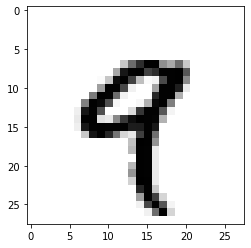

In [8]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
train_labels[4]

9

In [10]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

## Types of data tensors in real usecases

1. Vector Data <br>
=> rank-2 tensor (samples, features) <br><br>
2. Timeseries Data or sequence data<br>
=> rank-3 tensor (samples, timestamps, features)<br><br>
3. Images<br>
=> rank-4 tensor (sample, height, width, channels)<br><br>
4. Videos<br>
=> rank-5 tensor (sample, frame, height, width, channel)

## Tensor Operations

It is easy to write tensor operations from scratch but they are not usually optimizes. It can be implemented easily with NumPy. <br> 
(TODO: READ ABOUT Basic Linear Algebra Subroutines (BLAS))

In [11]:
'''NumPy operation for ReLu'''
import numpy as np
import random

x = np.random.random((20, 100))
y = np.random.random((20, 100))

z = x+y
z = np.maximum(z, 0.)

Comparing time...

In [12]:
import time

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print('Took: %.2f s' % (time.time() - t0))

Took: 0.01 s


In [13]:
def naive_relu(x):
    assert len(x.shape) == 2 
    x = x.copy() 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2 
    assert x.shape == y.shape
    x = x.copy() 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print('Took: %.2f s' % (time.time() - t0))


Took: 4.53 s


### Broadcasting

While doing certain tensor operations on tensors of different shapes, it is still possible to perform operations in certain cases and mechanism which makes it possible is known as **Broadcasting**. <br>
<br>
Broadcasting can be done in two steps:<br><br>
1. Axes are added in small tensors at specific index to match `ndim` of larger tensor.
<br>
2. The smaller tensor is repeated alongside new axes to match full shape of larger tensor. <br><br>

In terms of implementation, no new rank-2 tensor is created, because that would be terribly
inefficient. The repetition operation is entirely virtual: it happens at the algorithmic level rather
than at the memory level. But thinking of the vector being repeated 10 times alongside a new
axis is a helpful mental model.


In [14]:
import numpy as np
x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10)) 
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

### Tensor Product

In [18]:
x = [2,3]
y = [4,5]
z = np.dot(x, y)
x,y,z

([2, 3], [4, 5], 23)

#### Shape
(a,b)*(b,d)=(a,d)
(a, b, c, d) * (d, ) = > (a, b, c)

### Tensor reshaping

In [20]:
x = np.array([[0., 1.],
                [2., 3.],
                [4., 5.]])

x1 = x.reshape((6,1))
x2 = x.reshape((2,3))
x1, x2

(array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]]),
 array([[0., 1., 2.],
        [3., 4., 5.]]))

A multi-layer neural network made entirely of Dense layers without activations would be equivalent to single Dense layer.
Refer to Affine transform.

In [3]:
import tensorflow as tf
x = tf.Variable(0)
with tf.GradientTape() as tape:
    y = 2*x+3
grad_of_y_wrt_x = tape.gradient(y, x)